## 4. EDA: Text Preprocessing

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer    # lemmatize
from wordcloud import WordCloud, STOPWORDS
import string 

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Tanmay
[nltk_data]     Jamdar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Tanmay
[nltk_data]     Jamdar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
df1 = pd.read_csv('train.csv')

df1.head(5)

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [5]:
df2 = pd.read_csv('test.csv')

df2.head(2)

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."


In [6]:
frames = [df1,df2]
df = pd.concat(frames)

In [7]:
df.shape

(127600, 3)

### 4.1 Plotting Word clouds
- Creating Word Cloud of News articles of class "world", "sports", "business", and "Science
- We can observe the most frequent occuring words

In [8]:
STOP_WORDS = stopwords.words('english')

In [9]:
stopwords = set(STOP_WORDS)
stopwords.add("said")
stopwords.add("br")
stopwords.remove("not")
stopwords.remove("no")
stopwords.add(" ")

### World

In [10]:
world = df.Description[df['Class Index'][df['Class Index']==1].index]

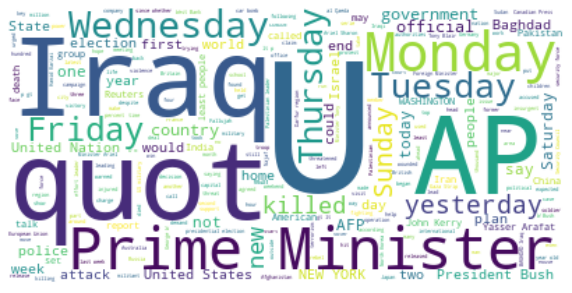

In [11]:
plt.figure(figsize = (10,15))
wc = WordCloud(max_words=500,background_color='White',stopwords=stopwords)
wc.generate(" ".join(world))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Sports

In [12]:
sports = df.Description[df['Class Index'][df['Class Index']==2].index]

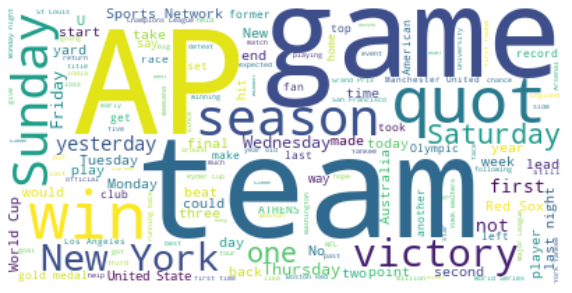

In [13]:
plt.figure(figsize = (10,15))
wc = WordCloud(max_words=500,background_color='White',stopwords=stopwords)
wc.generate(" ".join(sports))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Buisness

In [14]:
Buisness = df.Description[df['Class Index'][df['Class Index']==3].index]

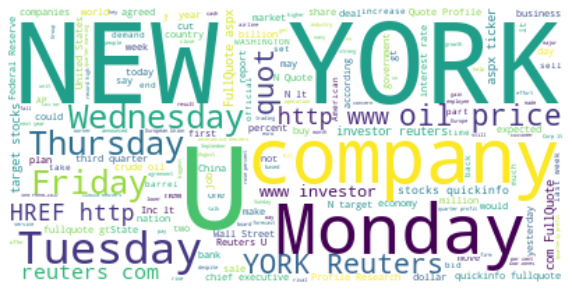

In [15]:
plt.figure(figsize = (10,15))
wc = WordCloud(max_words=500,background_color='White',stopwords=stopwords)
wc.generate(" ".join(Buisness))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Sci-Tech

In [16]:
Sci_Tech = df.Description[df['Class Index'][df['Class Index']==4].index]

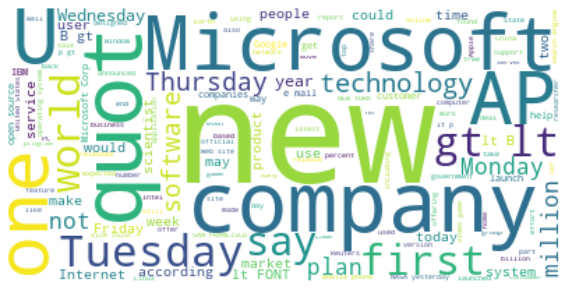

In [17]:
plt.figure(figsize = (10,15))
wc = WordCloud(max_words=500,background_color='White',stopwords=stopwords)
wc.generate(" ".join(Sci_Tech))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
df['Summary'] = df['Title'] + ' ' + df['Description']
df.drop(columns=['Title', 'Description'],inplace=True)

In [19]:
df.head()

,Class Index,Summary
0,3,Wall St. Bears Claw Back Into the Black (Reute...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...
4,3,"Oil prices soar to all-time record, posing new..."


### 4.2 Text Preprocessing
- Preprocessing:
    - Removing html tags 
    - Removing Punctuations
    - Performing stemming
    - Removing Stopwords
    - Expanding contractions etc.

### 4.2.1 Expanding contractions

In [20]:
def text_preproces(x):
    x = str(x).lower()
    x = x.replace('%',' percent').replace('₹',' rupee').replace('$',' dollar').replace('€',' euro')\
                                .replace(',000,000','m').replace('000','k').replace('′',"'").replace("’","'")\
                                .replace("won't","will not").replace("can't",'can not').replace("shouldn't","should not")\
                                .replace("what's",'"what is"').replace("that's",'that is').replace("he's","he is")\
                                .replace("she's","she is").replace("it's","it is").replace("'ve"," have").replace("'re"," are")\
                                .replace("'ll"," will").replace("i'm","i am").replace("n't", " not")
    x = re.sub(r'([0-9]+)000000',r'\1m',x)
    x = re.sub(r'([0-9]+)000',r'\1k',x)
    
    return x    

In [21]:
def extract_features(df):
    df['Summary'] = df['Summary'].fillna("").apply(text_preproces)
    print("token features...")
    
    return df

In [22]:
df = extract_features(df)

token features...


In [24]:
df.head()

,Class Index,Summary
0,3,wall st. bears claw back into the black (reute...
1,3,carlyle looks toward commercial aerospace (reu...
2,3,oil and economy cloud stocks' outlook (reuters...
3,3,iraq halts oil exports from main southern pipe...
4,3,"oil prices soar to all-time record, posing new..."


### 4.2.2 Removal of URLs

In [25]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df.Summary=df.Summary.apply(remove_urls)

### 4.2.3 Removal of HTML tags

In [26]:
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

df.Summary=df.Summary.apply(remove_html)

### 4.2.4 Tokenization of Data
-findall

findall() is probably the single most powerful function in the re module. Above we used re.search() to find the first match for a pattern. findall() finds *all* the matches and returns them as a list of strings, with each string representing one match.

#### Suppose we have a text with many email addresses
  str = 'purple alice@google.com, blah monkey bob@abc.com blah dishwasher'

#### Here re.findall() returns a list of all the found email strings
  emails = re.findall(r'[\w\.-]+@[\w\.-]+', str) ## ['alice@google.com', 'bob@abc.com']
  for email in emails:
    # do something with each found email string
    print email

In [27]:
def word_tokenize(txt):
    tokens = re.findall("[\w']+", txt)
    return tokens
df.Summary=df.Summary.apply(word_tokenize)

### 4.2.5 Removal of Stopwords

In [29]:
def remove_stopwords(lst):
    stop=stopwords
    new_lst=[]
    for i in lst:
        if i not in stop:
            new_lst.append(i)
    return new_lst

df.Summary=df.Summary.apply(remove_stopwords)

In [33]:
def remove_extrawords(lst):
    stop=['href','lt','gt','ii','iii','ie','quot','com']   ## This all words are most repeated words as we observed in WordCloud and it does not make any sense
    new_lst=[]
    for i in lst:
        if i not in stop:
            new_lst.append(i)
    return new_lst

df.Summary=df.Summary.apply(remove_extrawords)

### 4.2.6 Removal of Punctuation Symbols

In [39]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [40]:
def remove_punctuations(lst):
    new_lst=[]
    for i in lst:
        for j in  string.punctuation:
            i=i.replace(j,'')
        new_lst.append(i)
    return new_lst
df.Summary=df.Summary.apply(remove_punctuations)

### 4.2.7 Removal of Numbers(digits)

In [42]:
def remove_numbers(lst):
    nodig_lst=[]
    new_lst=[]

    for i in  lst:
        for j in  string.digits:
            i=i.replace(j,'')
        nodig_lst.append(i)
    for i in  nodig_lst:
        if  i!='':
            new_lst.append(i)
    return new_lst
df.Summary=df.Summary.apply(remove_numbers)

### 4.2.8 Lemmatization of Data

In [44]:
lemmatizer = WordNetLemmatizer()

In [45]:
def lemmatzation(lst):
    new_lst=[]
    for i in lst:
        i=lemmatizer.lemmatize(i)
        new_lst.append(i)
    return new_lst
df.Summary=df.Summary.apply(lemmatzation)

In [50]:
df.isnull().sum()

Class Index    0
Summary        0
dtype: int64

### 4.3  Exporting File to csv

In [51]:
df.to_csv('df.csv',index = 'False')